# 시험 점수 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Student Property

In [3]:
# 성별
# male: 남자, female: 여자
gender_count = df['gender'].value_counts()
gender_count

female    518
male      482
Name: gender, dtype: int64

In [4]:
# 인종 및 민족
# group A, B, C, D, E
race_count = df['race/ethnicity'].value_counts()
race_count

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

<BarContainer object of 5 artists>

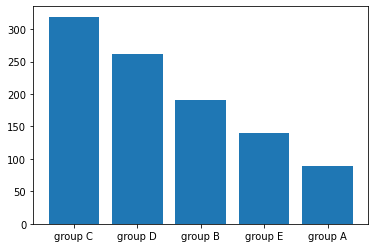

In [5]:
plt.bar(race_count.index, race_count)

In [6]:
# 부모의 학력
# some high school: 고등학교 중퇴
# high school: 고졸
# some college: 대학 중퇴
# associate's degree: 준학사 학위
# bachelor's degree: 학사 학위
# master's degree: 석사 학위
edu_count = df['parental level of education'].value_counts()
edu_count

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

<BarContainer object of 6 artists>

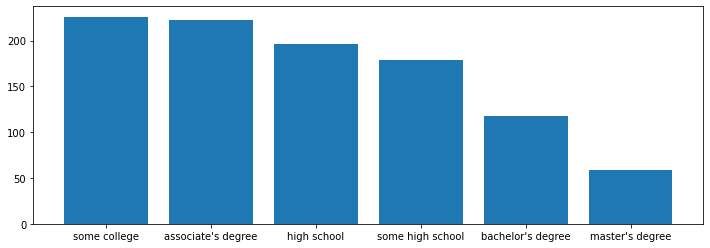

In [7]:
plt.figure(figsize=(12,4))
plt.bar(edu_count.index, edu_count)

In [8]:
# 점심
# standard: 일반 급식
# free/reduced: 무료/할인 급식
lunch_count = df['lunch'].value_counts()
lunch_count

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [9]:
# 시험 준비 코스
# completed: 수료, none: 미수료
course_count = df['test preparation course'].value_counts()
course_count

none         642
completed    358
Name: test preparation course, dtype: int64

###  lunch 살펴보기

In [10]:
df.groupby(['race/ethnicity', 'lunch'])['lunch'].count()

race/ethnicity  lunch       
group A         free/reduced     36
                standard         53
group B         free/reduced     69
                standard        121
group C         free/reduced    114
                standard        205
group D         free/reduced     95
                standard        167
group E         free/reduced     41
                standard         99
Name: lunch, dtype: int64

In [11]:
df['lunchx'] = np.where(df['lunch']=='standard',1,0)

In [12]:
race_lunch = df.groupby('race/ethnicity')['lunchx'].mean().to_frame().sort_values(by='lunchx', ascending=False)
race_lunch

,lunchx
race/ethnicity,
group E,0.707143
group C,0.642633
group D,0.637405
group B,0.636842
group A,0.595506


Text(0, 0.5, 'Standard Lunch Percentage')

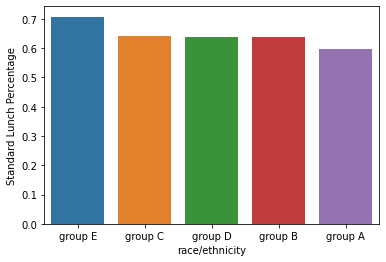

In [13]:
## 인종에 따른 점심(standard/free) 확인
sns.barplot(x=race_lunch.index, y='lunchx', data=race_lunch, ci=None)
plt.ylabel('Standard Lunch Percentage')

group E가 standard 점심을 먹는 비율이 약 70%로 가장 높았다.   
group A가 standard 점심을 먹는 비율이 약 60%로 가장 낮았다.

In [14]:
# 부모 학력에 따른 점심(standard/free)
edu_lunch = df.groupby('parental level of education')['lunchx'].mean().to_frame().sort_values(by='lunchx', ascending=False)
edu_lunch

,lunchx
parental level of education,
some high school,0.659218
associate's degree,0.653153
some college,0.650442
high school,0.642857
bachelor's degree,0.627119
master's degree,0.593220


Text(0, 0.5, 'Standard Lunch Percentage')

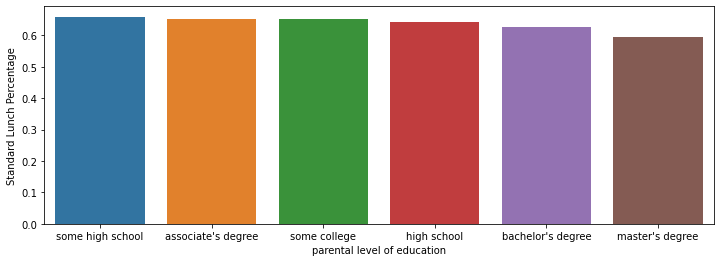

In [15]:
plt.figure(figsize=(12,4))
sns.barplot(x=edu_lunch.index, y='lunchx', data=edu_lunch,ci=None)
plt.ylabel('Standard Lunch Percentage')

부모의 학력이 석사 학위인 학생들이 standard 점심을 먹는 비율이 가장 낮았다.   
반대로, 부모의 학력이 고등학교 중퇴인 학생들이 standard 점심을 먹는 비율이 가장 높았다.   

### course 살펴보기

In [16]:
df['course'] = np.where(df['test preparation course']=='completed',1,0)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,lunchx,course
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0
1,female,group C,some college,standard,completed,69,90,88,1,1
2,female,group B,master's degree,standard,none,90,95,93,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0
4,male,group C,some college,standard,none,76,78,75,1,0
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1,1
996,male,group C,high school,free/reduced,none,62,55,55,0,0
997,female,group C,high school,free/reduced,completed,59,71,65,0,1
998,female,group D,some college,standard,completed,68,78,77,1,1


In [17]:
# 부모 학력에 따른 course
edu_course = df.groupby('parental level of education')['course'].mean().to_frame().sort_values(by='course', ascending=False)
edu_course

,course
parental level of education,
some high school,0.430168
bachelor's degree,0.389831
associate's degree,0.369369
some college,0.340708
master's degree,0.338983
high school,0.285714


Text(0, 0.5, 'Course Percentage')

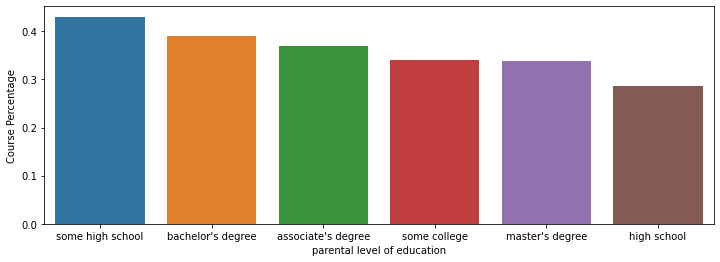

In [18]:
plt.figure(figsize=(12,4))
sns.barplot(x=edu_course.index, y='course', data=edu_course,ci=None)
plt.ylabel('Course Percentage')

# Exam Score

In [19]:
# gender와 score
gender_score = df.groupby('gender').agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'})
gender_score

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


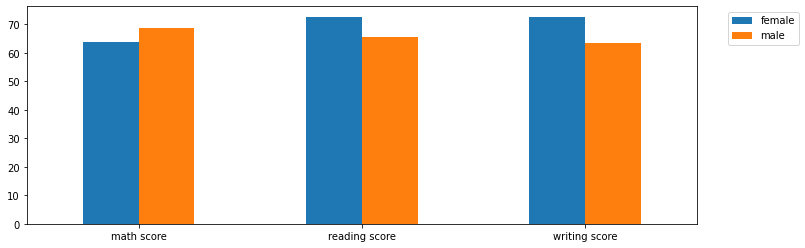

In [20]:
gender_score.transpose().plot(kind='bar', figsize=(12,4))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1, 0.9), loc='center')

남학생이 수학에서 평균 점수가 높은 반면, 여학생들이 읽기와 쓰기에서 평균 점수가 높았다.

In [21]:
# 인종과 score
race_score = df.groupby('race/ethnicity').agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'})
race_score

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


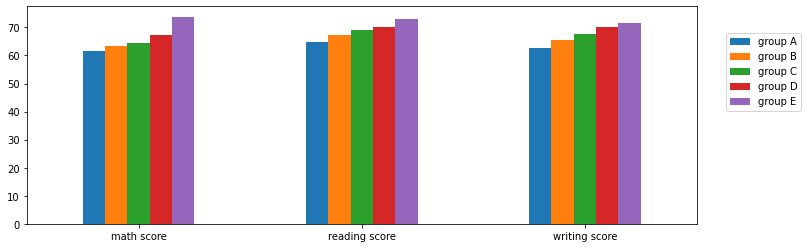

In [22]:
race_score.transpose().plot(kind='bar', figsize=(12,4))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1, 0.7), loc='center')

모든 과목에서 group E가 평균적으로 점수가 가장 높았고, group A가 가장 낮았다.

In [23]:
# 부모 학력과 score
edu_score = df.groupby('parental level of education').agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'})
edu_score

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


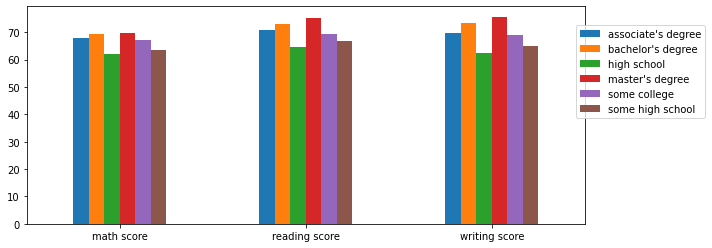

In [24]:
edu_score.transpose().plot(kind='bar', figsize=(10,4))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1, 0.7), loc='center')

세 과목 모두에서,   
부모 학력이 master > bachelor > associate > some college > some high school > high school인 순으로 학생들의 평균 점수가 높았다.

In [25]:
# course 수료와 점수
course_score = df.groupby('test preparation course').agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'})
course_score

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


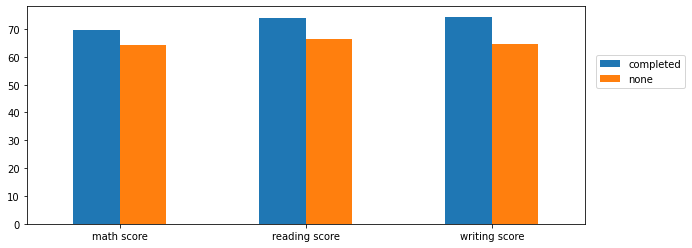

In [26]:
course_score.transpose().plot(kind='bar', figsize=(10,4))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1, 0.7), loc='center')

test course를 수료한 그룹이 모든 과목에서 평균적으로 점수가 높게 나왔다.

In [27]:
# 점심 급식과 점수
lunch_score = df.groupby('lunch').agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'})
lunch_score

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


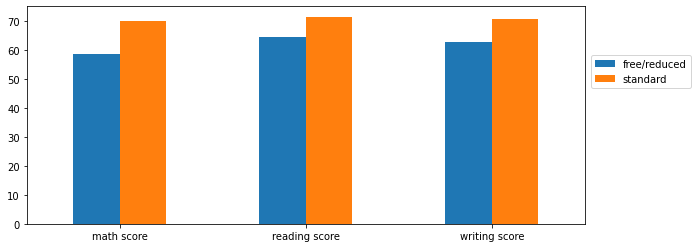

In [28]:
lunch_score.transpose().plot(kind='bar',figsize=(10,4))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1, 0.7), loc='center')

무료 급식을 받는 학생들보다 표준 급식을 먹는 학생들이 평균 점수가 더 높았다.

### Math, Reading, Writing

(0.0, 100.0)

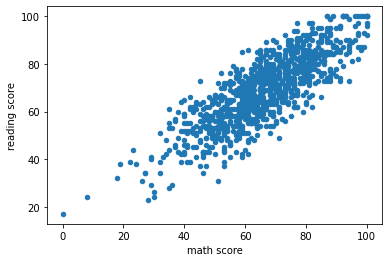

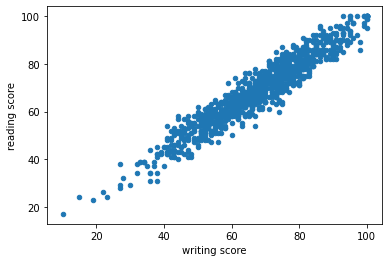

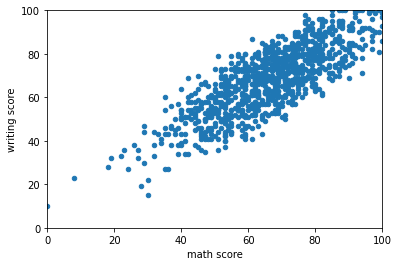

In [29]:
df.plot(x='math score', y='reading score', kind='scatter')
df.plot(x='writing score', y='reading score', kind='scatter')
df.plot(x='math score', y='writing score', kind='scatter')
plt.xlim(0,100)
plt.ylim(0,100)

In [30]:
df[['math score', 'reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [31]:
# Linear Regression
import statsmodels.formula.api as smf

In [32]:
ex_score = df.copy()
ex_score = ex_score.rename(columns = {'math score':'math', 'reading score':'reading', 'writing score':'writing',
                                     'test preparation course':'test_course', 'parental level of education':'parent_edu',
                                     'race/ethnicity':'race'})
ex_score

,gender,race,parent_edu,lunch,test_course,math,reading,writing,lunchx,course
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0
1,female,group C,some college,standard,completed,69,90,88,1,1
2,female,group B,master's degree,standard,none,90,95,93,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0
4,male,group C,some college,standard,none,76,78,75,1,0
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1,1
996,male,group C,high school,free/reduced,none,62,55,55,0,0
997,female,group C,high school,free/reduced,completed,59,71,65,0,1
998,female,group D,some college,standard,completed,68,78,77,1,1


In [33]:
lr = smf.ols(formula = 'math ~ writing + reading', data=ex_score).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          2.25e-243
Time:                        02:23:07   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5241      1.328      5.665      0.000       4.918      10.131
writing        0.2494      0.061      4.118      0.000       0.131       0.368
reading        0.6013      0.063      9.538      0.000       0.478       0.725
==============================================================================
Omnibus:                       10.227   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.801
Skew:                           0.006   Prob(JB):                       0.0334
Kurtosis:                       2.596   Cond. No.                         481.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lr2 = smf.ols(formula = 'math ~ writing + reading + gender', data=ex_score).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1751.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:23:07   Log-Likelihood:                -3219.1
No. Observations:                1000   AIC:                             6446.
Df Residuals:                     996   BIC:                             6466.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -6.1892      1.022     -6.058      0.000      -8.194      -4.184
gender[T.male]    13.1378      0.407     32.271      0.000      12.339      13.937
writing            0.5806      0.044     13.318      0.000       0.495       0.666
reading            0.3821      0.045      8.564      0.000       0.295       0.470
==============================================================================
Omnibus:                        1.586   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.587
Skew:                          -0.097   Prob(JB):                        0.452
Kurtosis:                       2.979   Cond. No.                         537.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

reading 점수와 gender가 같을 때, writing 점수가 1점 차이나면 math 점수가 평균적으로 0.58점 차이난다.   
writing 점수와 gender가 같을 때, reading 점수가 1점 차이나면 math 점수가 평균적으로 0.38점 차이난다.   
reading 점수와 writing 점수가 같다면, female(reference)일 때보다 male일 때 math 점수가 평균적으로 13.13점 높다.

In [35]:
lr3 = smf.ols(formula = 'math ~ writing + reading + gender + race + parent_edu + lunch + test_course', data=ex_score).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     500.3
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:23:07   Log-Likelihood:                -3090.7
No. Observations:                1000   AIC:                             6211.
Df Residuals:                     985   BIC:                             6285.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -11.6045      1.245     -9.322      0.000     -14.047      -9.162
gender[T.male]                     13.2405      0.372     35.599      0.000      12.511      13.970
race[T.group B]                     0.8354      0.692      1.207      0.228      -0.523       2.194
race[T.group C]                     0.1782      0.649      0.275      0.784      -1.095       1.452
race[T.group D]                     0.0984      0.670      0.147      0.883      -1.217       1.413
race[T.group E]                     5.0777      0.737      6.888      0.000       3.631       6.524
parent_edu[T.bachelor's degree]    -1.0469      0.616     -1.700      0.089      -2.255       0.161
parent_edu[T.high school]           0.5677      0.535      1.061      0.289      -0.482       1.618
parent_edu[T.master's degree]      -1.8561      0.793     -2.340      0.019      -3.413      -0.299
parent_edu[T.some college]          0.4003      0.508      0.788      0.431      -0.597       1.397
parent_edu[T.some high school]      0.5522      0.550      1.004      0.316      -0.527       1.631
lunch[T.standard]                   3.2127      0.374      8.585      0.000       2.478       3.947
test_course[T.none]                 3.5023      0.397      8.831      0.000       2.724       4.281
writing                             0.7016      0.044     16.120      0.000       0.616       0.787
reading                             0.2635      0.042      6.266      0.000       0.181       0.346
==============================================================================
Omnibus:                        0.330   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.402
Skew:                          -0.034   Prob(JB):                        0.818
Kurtosis:                       2.930   Cond. No.                         865.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Reference :**    
'gender': female   
'race': group A   
'parent_edu': associate's degree       
'lunch': none   
'test_course': completed   


In [36]:
lr4 = smf.ols(formula = 'math ~ writing + reading + gender + lunch + test_course', data=ex_score).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1250.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:23:07   Log-Likelihood:                -3144.2
No. Observations:                1000   AIC:                             6300.
Df Residuals:                     994   BIC:                             6330.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.3683      1.089     -9.520      0.000     -12.506      -8.231
gender[T.male]         13.1981      0.385     34.259      0.000      12.442      13.954
lunch[T.standard]       3.5188      0.389      9.040      0.000       2.755       4.283
test_course[T.none]     3.1201      0.407      7.670      0.000       2.322       3.918
writing                 0.6401      0.043     14.862      0.000       0.556       0.725
reading                 0.3219      0.043      7.559      0.000       0.238       0.405
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.530
Skew:                          -0.048   Prob(JB):                        0.767
Kurtosis:                       2.940   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
lr5 = smf.ols(formula = 'math ~ gender + lunch + test_course', data=ex_score).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     73.99
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           3.29e-43
Time:                        02:23:08   Log-Likelihood:                -4036.7
No. Observations:                1000   AIC:                             8081.
Df Residuals:                     996   BIC:                             8101.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              60.3052      1.013     59.530      0.000      58.317      62.293
gender[T.male]          4.8343      0.869      5.561      0.000       3.128       6.540
lunch[T.standard]      11.1037      0.908     12.231      0.000       9.322      12.885
test_course[T.none]    -5.7762      0.906     -6.376      0.000      -7.554      -3.998
==============================================================================
Omnibus:                        4.607   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.572
Skew:                          -0.166   Prob(JB):                        0.102
Kurtosis:                       3.011   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""